In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D,Dense,MaxPool2D,Flatten
from tensorflow.keras.regularizers import l2
import os
from os import listdir
import gdown
from zipfile import ZipFile
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [2]:
from tensorflow.keras.utils import img_to_array
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            img_gan = cv2.resize(image, (32,32))
            return img_to_array(img_gan)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [3]:
def extract_plant_imgs(directory_root,num):
    image_list, label_list = [], []
    try:
        print("[INFO] Loading images ...")
        root_dir = listdir(directory_root)
        #print(root_dir)
        for plant_folder in root_dir :
            # remove .DS_Store from list
            if plant_folder == ".DS_Store" :
                root_dir.remove(directory)


        for plant_folder in root_dir :
    #         print("on plant folder")
            plant_image_list = listdir(f"{directory_root}/{plant_folder}")



            for single_image in plant_image_list :

    #             print("in plant folder")
                if single_image == ".DS_Store" :
                    plant_image_list.remove(single_image)

            for image in plant_image_list[:num]:
    #             print("getting img path")
                image_directory = f"{directory_root}/{plant_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True or image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
    #                 print("checking if img correct format")
                    gan_img = convert_image_to_array(image_directory)
                    image_list.append(gan_img)
                    label_list.append(plant_folder)

        print("[INFO] Image loading completed")
        return image_list, label_list
    except Exception as e:
        print(f"Error : {e}")

In [81]:
orignal_data = 'Orignal_tomato'
enhanced_data = 'Enhanced_tomato_LSGANxSRGAN'

orignal_image_list , orignal_label_list = extract_plant_imgs(orignal_data,1000)
print(len(orignal_image_list))

[INFO] Loading images ...
[INFO] Image loading completed
2000


In [82]:
enhanced_image_list , enhanced_label_list = extract_plant_imgs(enhanced_data,1000)
print(len(enhanced_image_list))

[INFO] Loading images ...
[INFO] Image loading completed
2000


In [83]:
combined_image_list = orignal_image_list + enhanced_image_list
print(len(combined_image_list))

4000


In [84]:
combined_label_list = orignal_label_list + enhanced_label_list
print(len(combined_label_list))

4000


In [85]:
new_image_list = np.array(combined_image_list, dtype = np.float16) / 255.0
print(new_image_list.shape)

(4000, 32, 32, 3)


In [86]:
combined_label_list = orignal_label_list+enhanced_label_list

In [87]:
label_gen = LabelBinarizer()
image_labels = label_gen.fit_transform(combined_label_list)
pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
n_classes = len(label_gen.classes_)
print(n_classes)
print(image_labels)

2
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [88]:
from sklearn.model_selection import train_test_split
print("making the training and testing split with 30% of the dataset as testing set")
x_train, x_test, y_train, y_test = train_test_split(new_image_list, image_labels, test_size=0.3, shuffle=True,random_state = 42) 
print(x_train.shape)
print(x_test.shape)

making the training and testing split with 30% of the dataset as testing set
(2800, 32, 32, 3)
(1200, 32, 32, 3)


In [89]:

# Define the input shape of the images
input_shape = (32, 32, 3)

# Initialize the model
model = Sequential()

# Add the first convolutional layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# Add the max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the second convolutional layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add the max pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add the flatten layer
model.add(Flatten())

# Add the dense layer
model.add(Dense(128, activation='relu'))

# Add the output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the summary of the model architecture
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               295040    
_________________________________________________________________
dense_11 (Dense)             (None, 1)                

In [90]:
# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=16)


Epoch 1/10
175/175 [==============================] - 2s 5ms/step - loss: 0.2667 - accuracy: 0.8975
Epoch 2/10
175/175 [==============================] - 1s 4ms/step - loss: 0.1394 - accuracy: 0.9518
Epoch 3/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0846 - accuracy: 0.9743
Epoch 4/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0594 - accuracy: 0.9800
Epoch 5/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0446 - accuracy: 0.9846
Epoch 6/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0534 - accuracy: 0.9839
Epoch 7/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0442 - accuracy: 0.9875
Epoch 8/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0288 - accuracy: 0.9907
Epoch 9/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0287 - accuracy: 0.9911
Epoch 10/10
175/175 [==============================] - 1s 4ms/step - loss: 0.0277 - accuracy: 0.9929

In [91]:
orig = 'Orignal_tomato'
orig_img , orig_label = extract_plant_imgs(orig,1000)
new_orig = np.array(orig_img, dtype = np.float16) / 255.0

[INFO] Loading images ...
[INFO] Image loading completed


In [92]:
label_gen = LabelBinarizer()
orig_img_labels = label_gen.fit_transform(orig_label)
pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
n_classes = len(label_gen.classes_)
print(n_classes)
print(len(orig_img_labels))

2
2000


In [93]:
from sklearn.model_selection import train_test_split
print("making the training and testing split with 30% of the dataset as testing set")
x_orig_train, x_orig_test, y_orig_train, y_orig_test = train_test_split(new_orig, orig_img_labels, test_size=0.3, shuffle=True,random_state = 42) 


making the training and testing split with 30% of the dataset as testing set


In [94]:


y_pred = model.predict(x_orig_test)

y_pred_binary = np.where(y_pred > 0.5, 1, 0)

# Calculate the true labels for the test set
y_true = y_orig_test

accuracy = accuracy_score(y_orig_test, y_pred_binary)
precision = precision_score(y_orig_test, y_pred_binary)
recall = recall_score(y_orig_test, y_pred_binary)
f1 = f1_score(y_orig_test, y_pred_binary)
conf_matrix = confusion_matrix(y_orig_test, y_pred_binary)


print("Accuracy:", accuracy * 100)
print("Precision:", precision * 100)
print("Recall:", recall * 100)
print("F1-score:", f1 * 100)

Accuracy: 99.5
Precision: 99.66329966329967
Recall: 99.32885906040269
F1-score: 99.49579831932773


In [95]:
model.save("plant_tomato_combined_LSGAN_cnn.h5")

In [58]:
# new combined iterative graph code

In [6]:
def train_model(img_list, lab_list, orig_img, orig_lab):
    new_list = np.array(img_list, dtype = np.float16) / 255.0
    print(new_list.shape)
    
    label_gen = LabelBinarizer()
    im_labels = label_gen.fit_transform(lab_list)
    pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
    n_classes = len(label_gen.classes_)
   
    
    norm_orig_list = np.array(orig_img, dtype = np.float16) / 255.0
    
    label_gen = LabelBinarizer()
    orig_list_lab = label_gen.fit_transform(orig_lab)
    pickle.dump(label_gen,open('label_transform.pkl', 'wb'))
    n_classes = len(label_gen.classes_)
    
    
    from sklearn.model_selection import train_test_split
    print("making the training and testing split with 30% of the dataset as testing set")
    orig_x_train, orig_x_test, orig_y_train, orig_y_test = train_test_split(norm_orig_list, orig_list_lab, test_size=0.3, shuffle=True,random_state = 42) 
   
    
    
    from sklearn.model_selection import train_test_split
    print("making the training and testing split with 30% of the dataset as testing set")
    x_train, x_test, y_train, y_test = train_test_split(new_list, im_labels, test_size=0.3, shuffle=True,random_state = 42) 
    print(x_train.shape)
    print(x_test.shape)
    
    input_shape = (32, 32, 3)

    # Initialize the model
    model = Sequential()

    # Add the first convolutional layer
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

    # Add the max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add the second convolutional layer
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

    # Add the max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Add the flatten layer
    model.add(Flatten())

    # Add the dense layer
    model.add(Dense(128, activation='relu'))

    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(x_train, y_train, epochs=10, batch_size=16)
    return model, orig_x_test, orig_y_test


In [7]:
def get_result(model,x_test, y_test):
    y_pred = model.predict(x_test)

    y_pred_binary = np.where(y_pred > 0.5, 1, 0)

    # Calculate the true labels for the test set
    y_true = y_test
    
    accuracy = accuracy_score(y_test, y_pred_binary)
    precision = precision_score(y_test, y_pred_binary)
    recall = recall_score(y_test, y_pred_binary)
    f1 = f1_score(y_test, y_pred_binary)
    
    return accuracy

In [8]:
import matplotlib.pyplot as plt

def generate_performance_graph(type_dataset, original_path):
    # Define the number of images to use in each iteration
    num_images = [0,100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
    
    # Initialize an empty list to store the performance metrics
    performance_metrics = []
    
    # Train the model iteratively with increasing number of images and collect the performance metrics
    for n in num_images:
        # Load the dataset with n images
        type_image_list , type_label_list = extract_plant_imgs(type_dataset,1000)
        orignal_image_list , orignal_label_list = extract_plant_imgs(original_path,n)
        orig_img , orig_lab = extract_plant_imgs(original_path,1000)
#         dataset = load_dataset(n)
        combined_img_list = type_image_list + orignal_image_list
        combined_label_list = type_label_list + orignal_label_list
        
        # Train the model with the dataset and get the performance metric
        model, x_test, y_test = train_model(combined_img_list, combined_label_list, orig_img, orig_lab)
        
        accuracy = get_result(model, x_test, y_test)
        
        # Store the performance metric in the list
        performance_metrics.append(accuracy)
    
    # Generate the graph
    return performance_metrics, num_images


In [9]:
def plot_graph(performance_metrics, num_images, title):
    plt.plot(num_images, performance_metrics)
    plt.title(title)
    plt.xlabel('Number of Images')
    plt.ylabel('Accuracy')
#     plt.bar(num_images,performance_metrics)
    plt.savefig(title + 'CNN')
    plt.show()

Enhanced_strawberry_DCGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.1547 - accuracy: 0.9500
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0016 - accuracy: 1.0000
Epoch 3/10
88/88 [==============================] - 0s 5ms/step - loss: 6.6608e-04 - accuracy: 1.0000
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 3.7264e-04 - accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 2.2238e-04 - accuracy: 1.0000
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 1.4788e-04 - accuracy:

132/132 [==============================] - 1s 5ms/step - loss: 0.0091 - accuracy: 0.9957
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(3200, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(2240, 32, 32, 3)
(960, 32, 32, 3)
Epoch 1/10
140/140 [==============================] - 1s 5ms/step - loss: 0.2710 - accuracy: 0.8612
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1048 - accuracy: 0.9629
Epoch 3/10
140/140 [==============================] - 0s 4ms/step - loss: 0.0646 - accuracy: 0.9790
Epoch 4/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0486 - accuracy: 0.9821
Epoch 5/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0459 - accuracy: 0.9862
Epoch 6/10
140/140 [=============

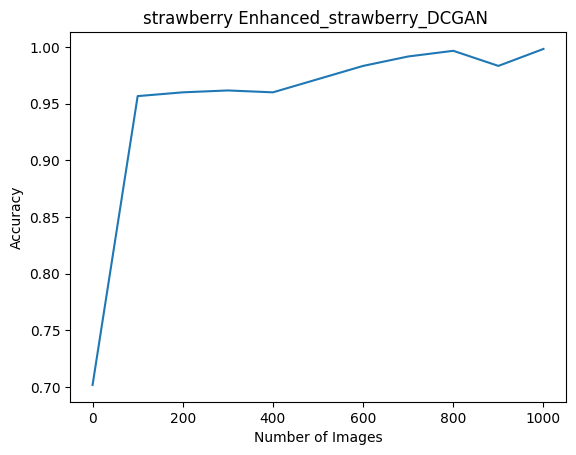

Enhanced_strawberry_DCGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.2585 - accuracy: 0.8914
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 3/10
88/88 [==============================] - 0s 5ms/step - loss: 6.1826e-04 - accuracy: 1.0000
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 2.1696e-04 - accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 1.1979e-04 - accuracy: 1.0000
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 8.6544e-05 - acc

C:\Users\jagme\anaconda3\envs\new_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/10
97/97 [==============================] - 1s 6ms/step - loss: 0.1818 - accuracy: 0.9318
Epoch 2/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0367 - accuracy: 0.9864
Epoch 3/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0345 - accuracy: 0.9870
Epoch 4/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0412 - accuracy: 0.9857
Epoch 5/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0182 - accuracy: 0.9935
Epoch 6/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0134 - accuracy: 0.9935
Epoch 7/10
97/97 [==============================] - 0s 5ms/s

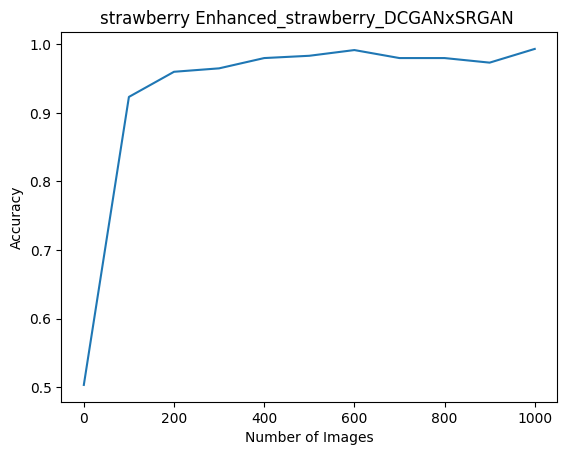

Enhanced_strawberry_LSGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.3407 - accuracy: 0.8521
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0204 - accuracy: 0.9986
Epoch 3/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 0.9993
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 0.9986
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0114 - accuracy: 0.9971
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0117 - accuracy: 0.9964
Epoch 7/

C:\Users\jagme\anaconda3\envs\new_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2200, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1540, 32, 32, 3)
(660, 32, 32, 3)
Epoch 1/10
97/97 [==============================] - 1s 6ms/step - loss: 0.3572 - accuracy: 0.8325
Epoch 2/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0484 - accuracy: 0.9805
Epoch 3/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0549 - accuracy: 0.9799
Epoch 4/10
97/97 [==============================] - 0s 5ms/step - loss: 0.0129 - accuracy: 0.9961
Epoch 5/10
97/97 [==============================] - 0s 4ms/step - loss: 0.0231 - accuracy: 0.9922
Epoch 6/10
97/97 [==============================] - 0s 5ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 7/10
97/97 [==============================] - 0s 5ms/s

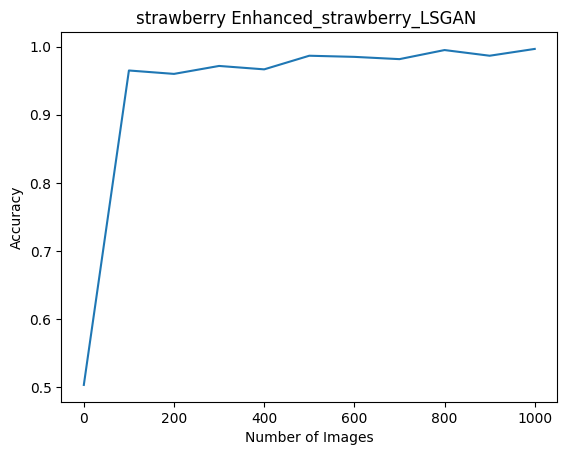

Enhanced_strawberry_LSGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.4859 - accuracy: 0.7521
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0457 - accuracy: 0.9964
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0023 - accuracy: 1.0000
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0014 - accuracy: 1.0000
Epoch 6/10
88/88 [==============================] - 0s 4ms/step - loss: 5.4736e-04 - accuracy: 1.000

132/132 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.9995
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(3200, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(2240, 32, 32, 3)
(960, 32, 32, 3)
Epoch 1/10
140/140 [==============================] - 1s 5ms/step - loss: 0.4435 - accuracy: 0.7871
Epoch 2/10
140/140 [==============================] - 1s 4ms/step - loss: 0.1307 - accuracy: 0.9487
Epoch 3/10
140/140 [==============================] - 1s 4ms/step - loss: 0.0500 - accuracy: 0.9812
Epoch 4/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.9866
Epoch 5/10
140/140 [==============================] - 0s 3ms/step - loss: 0.0241 - accuracy: 0.9902
Epoch 6/10
140/140 [=============

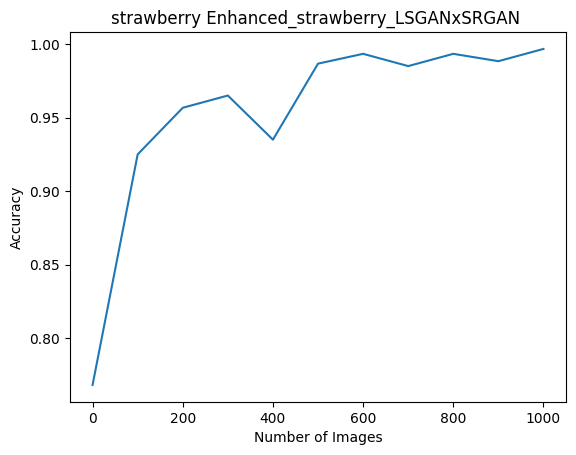

Enhanced_strawberry_WGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.2921 - accuracy: 0.8536
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0310 - accuracy: 0.9907
Epoch 3/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0130 - accuracy: 0.9971
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9721
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 0.9986
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 7/1

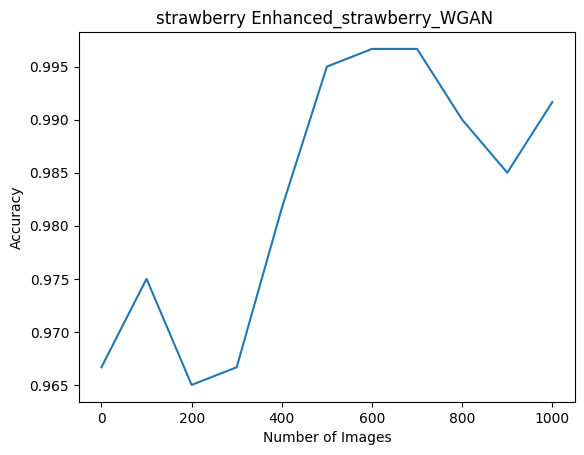

Enhanced_strawberry_WGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 6ms/step - loss: 0.4795 - accuracy: 0.7586
Epoch 2/10
88/88 [==============================] - 0s 4ms/step - loss: 0.2323 - accuracy: 0.8993
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.1753 - accuracy: 0.9250
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 0.1081 - accuracy: 0.9636
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0683 - accuracy: 0.9764
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0443 - accuracy: 0.9879
Epo

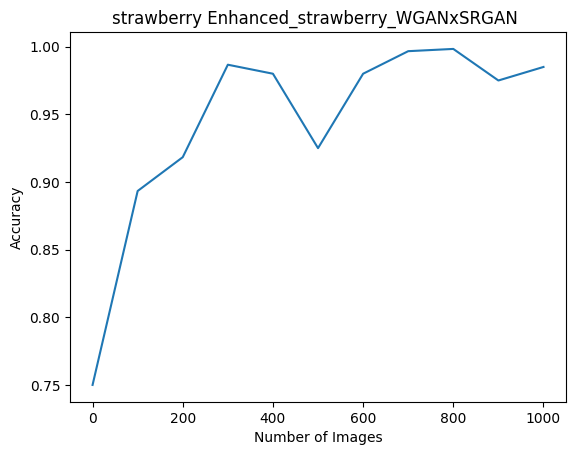

Enhanced_strawberry_BiGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.4187 - accuracy: 0.8164
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.1606 - accuracy: 0.9336
Epoch 3/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0855 - accuracy: 0.9664
Epoch 4/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0537 - accuracy: 0.9829
Epoch 5/10
88/88 [==============================] - 0s 4ms/step - loss: 0.0392 - accuracy: 0.9871
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0204 - accuracy: 0.9957
Epoch 7/

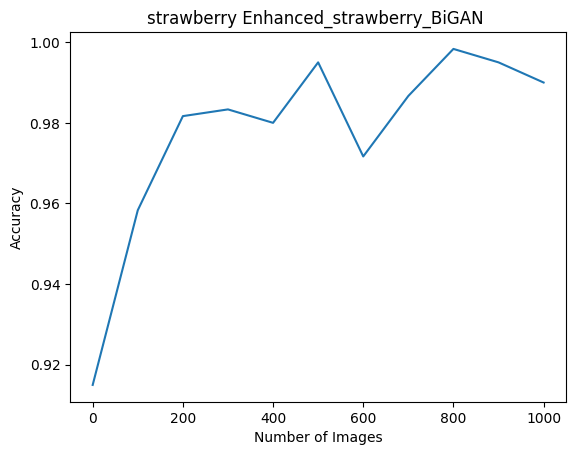

Enhanced_strawberry_BiGANxSRGAN
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
[INFO] Loading images ...
[INFO] Image loading completed
(2000, 32, 32, 3)
making the training and testing split with 30% of the dataset as testing set
making the training and testing split with 30% of the dataset as testing set
(1400, 32, 32, 3)
(600, 32, 32, 3)
Epoch 1/10
88/88 [==============================] - 1s 7ms/step - loss: 0.5878 - accuracy: 0.6636
Epoch 2/10
88/88 [==============================] - 0s 5ms/step - loss: 0.3039 - accuracy: 0.8750
Epoch 3/10
88/88 [==============================] - 0s 5ms/step - loss: 0.1181 - accuracy: 0.9657
Epoch 4/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0869 - accuracy: 0.9693
Epoch 5/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9829
Epoch 6/10
88/88 [==============================] - 0s 5ms/step - loss: 0.0242 - accuracy: 0.9936
Ep

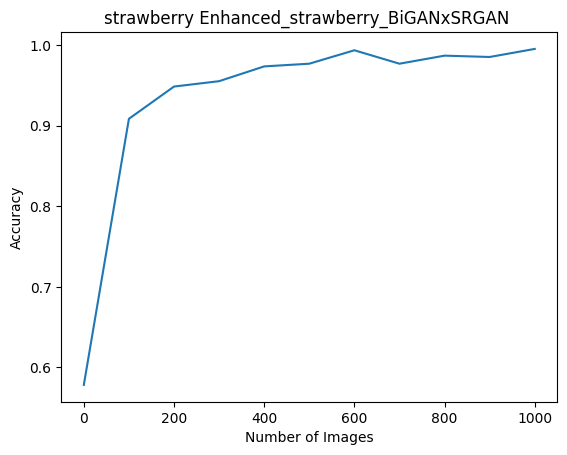

In [13]:
types_gans = ['Enhanced_strawberry_DCGAN', 'Enhanced_strawberry_DCGANxSRGAN', 
              'Enhanced_strawberry_LSGAN', 'Enhanced_strawberry_LSGANxSRGAN',
              'Enhanced_strawberry_WGAN', 'Enhanced_strawberry_WGANxSRGAN', 
              'Enhanced_strawberry_BiGAN', 'Enhanced_strawberry_BiGANxSRGAN']

for names in types_gans:
    print(names)
    type_gan_path = names
    title_gan = 'strawberry ' + names + " "
    orig_plant_path = 'Orignal_strawberry'
    
    perf_list, n_list = generate_performance_graph(type_gan_path, orig_plant_path)
    plot_graph(perf_list, n_list, title_gan)


